In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
import json
%matplotlib inline

In [2]:
def add_random_error_pixels(img, size=(10, 10)):
    """
    @img: matrix with the image (3 channel)
    @size: (s_x, x_y) size of the error
    return (img, central_point, max_size)
    """
    n_rows, n_cols, _ =img.shape
    x = np.random.randint(10, n_cols-size[0] - 10, size=1)[0]
    y = np.random.randint(10, n_rows-size[1] - 10, size=1)[0]
    central_point = (int(x + size[0] / 2), int(y + size[1]/2))
    delta = np.random.randint(10, 40, size=3)
    for offset_x in range(size[0]):
        for offset_y in range(size[1]):
            color = (img.item(y+offset_y, x+offset_x, 0), 
                     img.item(y+offset_y, x+offset_x, 1), 
                     img.item(y+offset_y, x+offset_x, 2))
            new_color = (color[0] + delta[0], color[1] + delta[1], color[2] + delta[2] )
            new_color = [n % 255 for n in new_color ]
            img.itemset((y+offset_y, x+offset_x, 0), new_color[0])
            img.itemset((y+offset_y, x+offset_x, 1), new_color[1])
            img.itemset((y+offset_y, x+offset_x, 2), new_color[2])
    # blur
    blur_delta = 5
    blurred = cv.blur(img[x-blur_delta:x+size[0] + blur_delta, y-blur_delta:y+size[1]+blur_delta], (9,9))
    img[x-blur_delta:x+size[0] + blur_delta, y-blur_delta:y+size[1]+blur_delta] = blurred
    return img, central_point, max(size)

def add_random_error_missing(img, size=10):
    """
    @img: matrix with the image (3 channel)
    @size: size of the error, 1D (used same for both the directions)
    return (img, central_point, max_size)
    """
    size = (size, size)
    n_rows, n_cols, _ =img.shape
    x = np.random.randint(10, n_cols-size[0] - 10, size=1)[0]
    y = np.random.randint(10, n_rows-size[1] - 10, size=1)[0]
    central_point = (int(x + size[0] / 2), int(y + size[1]/2))
    for offset_x in range(size[0]):
        for offset_y in range(size[1]):
            img.itemset((y+offset_y, x+offset_x, 0), 255)
            img.itemset((y+offset_y, x+offset_x, 1), 255)
            img.itemset((y+offset_y, x+offset_x, 2), 255)
    return img, central_point, max(size)

def add_random_error_translate(img, size=(10, 10)):
    """
    @img: matrix with the image (3 channel)
    @size: (s_x, x_y) size of the error
    return (img, central_point, max_size)
    """
    n_rows, n_cols, _ =img.shape
    x = np.random.randint(10, n_cols-size[0] - 10, size=1)[0]
    y = np.random.randint(10, n_rows-size[1] - 10, size=1)[0]
    t_delta = np.random.randint(50, size=1)[0]
    # starting point of the region to translate
    t_x, t_y = x - t_delta, y - t_delta

    central_point = (int(x + size[0] / 2), int(y + size[1]/2))
    delta = 50
    for offset_x in range(size[0]):
        for offset_y in range(size[1]):
            color = (img.item(t_y + offset_y, t_x + offset_x, 0), 
                     img.item(t_y + offset_y, t_x + offset_x, 1), 
                     img.item(t_y + offset_y, t_x + offset_x, 2))

            img.itemset((y+offset_y, x+offset_x, 0), color[0])
            img.itemset((y+offset_y, x+offset_x, 1), color[1])
            img.itemset((y+offset_y, x+offset_x, 2), color[2])
    # blur
    blur_delta = 5
    blurred = cv.blur(img[x-blur_delta:x+size[0] + blur_delta, y-blur_delta:y+size[1]+blur_delta], (9,9))
    img[x-blur_delta:x+size[0] + blur_delta, y-blur_delta:y+size[1]+blur_delta] = blurred
    return img, central_point, max(size)

In [3]:
def get_img_with_errors(img, errors, max_size):
    for error in errors:
        img = cv.circle(img, error, max_size, (255, 255, 255), 1)
    return img

In [4]:
def apply_distortion(img):
    alpha, beta = 1 + np.random.randint(12, size=1)[0]/100, -(np.random.randint(10, size=1)[0])
    print(alpha, beta)
    img = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img

In [5]:
base_path = 'data\images'
save_path = os.path.join(base_path, 'generated')
test_images = os.listdir(base_path)

In [6]:
img = cv.imread(os.path.join(base_path, test_images[0]))

## Test with single image

1.09 -1


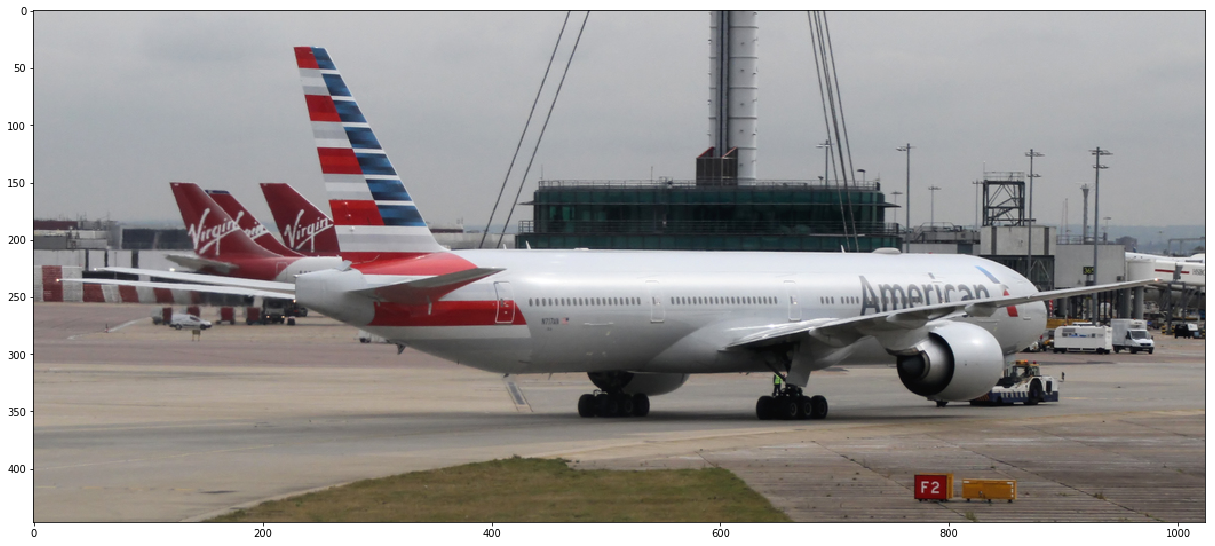

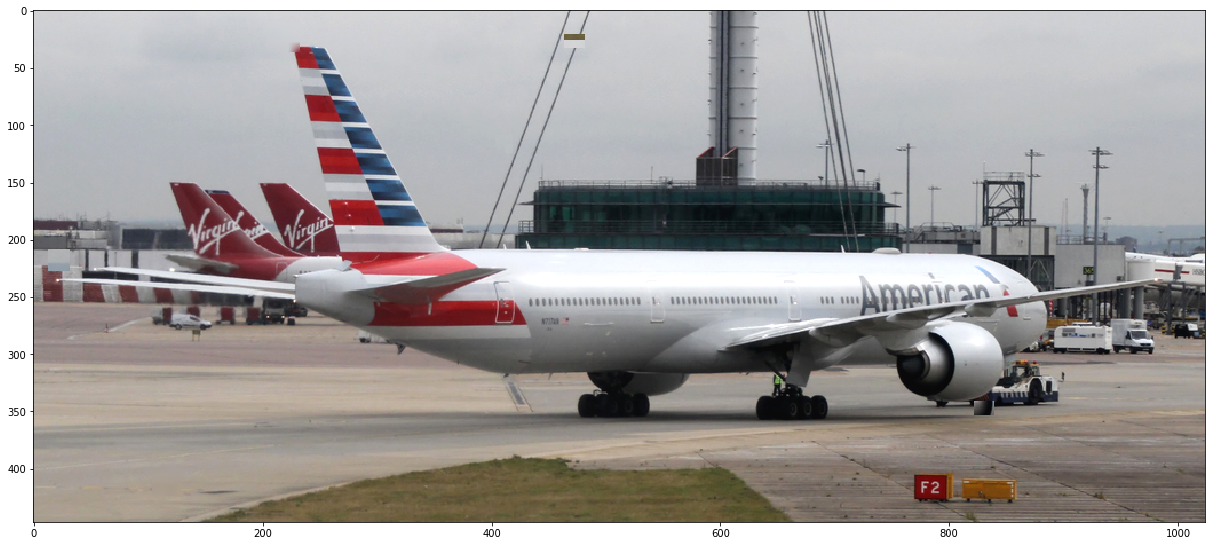

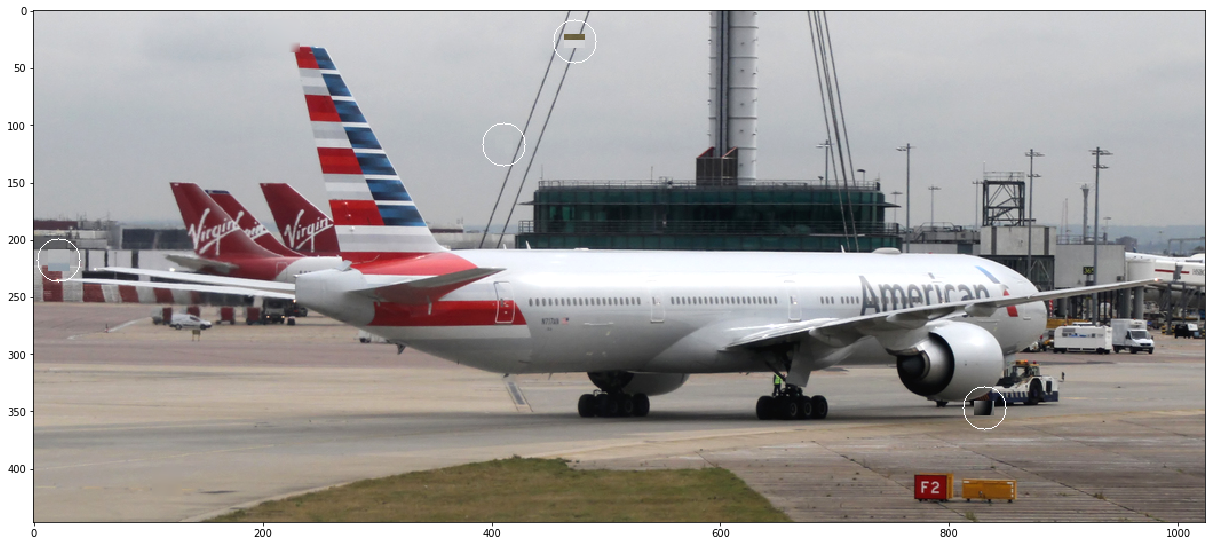

In [7]:
b,g,r = cv.split(img)
img_rgb = cv.merge((r,g,b))
_, ax = plt.subplots(figsize=(21, 18))
ax.imshow(img_rgb)
errors = []
max_size = 0
for i in range(4):
    # img_rgb, point, error_size = add_random_error_pixels(img_rgb, size=np.random.randint(10, 16, size=2))
    # img_rgb, point, error_size = add_random_error_missing(img_rgb, size=np.random.randint(2, 5, size=1)[0])
    img_rgb, point, error_size = add_random_error_translate(img_rgb, size=np.random.randint(12, 20, size=2))
    errors.append(point)
    max_size = max(max_size, error_size)
    
img_rgb = apply_distortion(img_rgb)

_, ax = plt.subplots(figsize=(21, 18))
ax.imshow(img_rgb)
_, ax = plt.subplots(figsize=(21, 18))
base_path = 'data\images'
save_path = os.path.join(base_path, 'generated')
test_images = os.listdir(base_path)
ax.imshow(get_img_with_errors(img_rgb, errors, max_size))

In [4]:
base_path = 'data\images'
save_path = os.path.join(base_path, 'generated')
if not os.path.exists(save_path):
    os.mkdir(save_path)
test_images = os.listdir(base_path)
num_images = len(test_images)
traning_info = []
for i, file_name in enumerate(test_images):
    if 'generated' in file_name:
        continue
    if i % 100 == 0:
        print("Processed ", i, " images")
    # print(file_name)
    img = cv.imread(os.path.join(base_path, file_name))
    errors = []
    max_size = 0
    for i in range(np.random.randint(2, 10, size=1)[0]):
        # insert random errors
        if np.random.random_sample() < 0.4:
            img, point, error_size = add_random_error_pixels(img, size=np.random.randint(10, 16, size=2))
            errors.append(point)
            max_size = max(max_size, error_size)
        if np.random.random_sample() < 0.15:
            img, point, error_size = add_random_error_missing(img, size=np.random.randint(4, 8, size=1)[0])
            errors.append(point)
            max_size = max(max_size, error_size)
        if np.random.random_sample() < 0.3:
            img, point, error_size = add_random_error_translate(img, size=np.random.randint(12, 20, size=2))
            errors.append(point)
            max_size = max(max_size, error_size)
            
    # apply random distortion in contrast and brightness to the output image
    img = apply_distortion(img)
    
    name, ext = file_name.split('.')
    out_file_name_master = os.path.join(save_path, name + '-master.' + ext)
    out_file_name_sample = os.path.join(save_path, name + '-sample.' + ext)
    out_file_name_high = os.path.join(save_path, name + '-high.' + ext)
    shutil.copyfile(os.path.join(base_path, file_name), out_file_name_master)
    cv.imwrite(out_file_name_sample, img)
    cv.imwrite(out_file_name_high, get_img_with_errors(img, errors, max_size))
    
    traning_info.append((out_file_name_master, out_file_name_sample, out_file_name_high, json.dumps(errors)))
    
with open(os.path.join(save_path, 'training.csv'), 'w') as file_to_write:
    for info in traning_info:
        file_to_write.write(','.join(info) + '\n')
print("DONE")

Processed  0  images
Processed  100  images
Processed  200  images
Processed  300  images
Processed  400  images
Processed  500  images
Processed  600  images
Processed  700  images
Processed  800  images
Processed  900  images
Processed  1000  images
Processed  1100  images
Processed  1200  images
Processed  1300  images
Processed  1400  images
Processed  1500  images
Processed  1600  images
Processed  1700  images
Processed  1800  images
Processed  1900  images
Processed  2000  images
Processed  2100  images
Processed  2200  images
Processed  2300  images
Processed  2400  images
Processed  2500  images
Processed  2600  images
Processed  2700  images
Processed  2800  images
Processed  2900  images
Processed  3000  images
Processed  3100  images
Processed  3200  images
Processed  3300  images
Processed  3400  images
Processed  3500  images
Processed  3600  images
Processed  3700  images
Processed  3800  images
Processed  3900  images
Processed  4000  images
Processed  4100  images
Proc